Week 7: Visualization (cont.)
======

Last week we showed a lot of examples of visualizations and discussed what about them made them useful or confusing.  
In summary:

* Visualizations can be incredibly powerful at:
  * Conveying a lot of information in a small amount of space
  * Bringing understanding not obvious from the raw data
* Well done visualizations bring insights and understanding to a broader range of people
* Poorly done visualizations leads to obfuscation and confusion

Visualization Objectives
---------------

As discussed last week, the main objectives for any visualizations are:

* Strive for *form and function*
* Grab people’s attention *aesthetically*, then provide something functional
* Seek to create *accessibility* into a subject through design that is as *intuitive* as possible
* *Justify* the inclusion, exclusion, and deployment of every element
* *Never deceive*

Getting to Good
---------------

So, what steps to we, as data scientists, need to take to make our graphics meaningful and insightful? Lets start by loading a dataset to work with.

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from ggplot import *

df = pd.read_csv('diamonds.csv')

/home/john/.local/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


In [3]:
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

Ask yourself the following questions:

1. Who is the intended audience?

   Sometimes you make visualizations for you, to help you understand 
   and identify what insights you can gather from the data. In this 
   case, the graphics you choose are very utilitiarian.  There is 
   little sense in putting extra effort into the chart to make it "look 
   nice" as long as it gets the information across to you, who is 
   already familiar with the data.  However, if target  someone else 
   gain insights into data, putting in extra effort to make the data 
   stand out is crucial.  


2. What is the best type of visualization for what I'm trying to learn or convey?

    We assume you're already working with a dataset, and you can 
    already see the data in tabular form (a dataframe).  If your 
    primary goal is to present as much raw data as possible without 
    much interpretation, then a Table might be your best bet.  If your 
    goal is to highlight a difference between two variables, then a 
    multi-variate chart is probably the best. If the goal is to show 
    the entirety of a variable in amount of space, a histogram might be 
    a best bet. 

    Some basic types of visualizations available tables:

      * Tables
      * Histogram
      * Pie Chart
      * Bar Chart
      * Box Plot
      * Scatter Plot
      * Area Chart
      * Heat Map
      * Correlogram
    
    We will cover all of these in sections below with examples, and
    each is most useful in different ways.
    
    ![Charts](charts.png)

3. What libraries are available in Python for visualization?

    For Tables, Pandas allows styling of their tables to make them look 
    nice. One can also use spreadsheets to get the table looking the 
    way they prefer. 

    By far, the most powerful and feature-rich plotting library in 
    python is `matplotlib`, which provides all the basic primatives 
    needed for drawing all sorts of graphs, plots, and even images.
    I understand it's based upon MATLAB's plotting interface. 
    
    There are other libraries, including `seaborn` and `ggplot` that 
    are also available.  `ggplot` is a direct implementation of the 
    `ggplot2` plotting package from R, and is based upon the *Grammar 
    of Graphics* method of thinking abotu plots.  However, `ggplot` is
    relatively immature for python, and in fact needed source code 
    modifications to work with newer pandas on my system.
    
    Many people like `seaborn`, as it's a higher-layer wrapper around 
    matplotlib.  However, I find seaborn to be limited in scope as 
    well.
    
    Both extra libraries build upon `matplotlib`.  
    

4. How do I know if I've succeeded? 

   Show your graphics to other people and get feedback.  Find some 
   people who are both familiar with your dataset and some that aren't. 
   Feedback is the single most important tool to know if you are 
   achieving your desired results. 

Dependent and Independent Variables
-----------

Think back to high school (see: https://blog.prepscholar.com/independent-and-dependent-variables )

* The independent variable is the variable whose change isn’t affected by any other variable in the experiment.  (generally `x`)

* The dependent variable is what is being studied and measured in the experiment. (generally `y`)

When creating graphs, we often need to identify which variable we're using as the independent variable and which is the dependent one. 

For example, on a histogram, what's the independent variable? What's the dependent variable?

Tables vs. Charts
-------------

Tables in and of themselves are useful visualizations of data.  We don't often think of them that way, but they are.  They convey a lot of information in a condensed space. So when do you want to use them versus something more visual?

(from:
http://www.storytellingwithdata.com/blog/2011/11/visual-battle-table-vs-graph )


    One important thing to know is that people interact very differently with these two types of visuals. 
 
    ...
 
    __Tables__, with their rows and columns of data, interact primarily with our verbal system. We read tables. When I have a table in front of me, I typically have my two index fingers out - I scan across rows, down columns, and I compare values. Tables are great when you have an audience who wants to do just that. Or if you have a diverse audience, where each wants to look at their own piece: a table can meet this need. Tables are also handy when you have many different units of measure, which can be difficult to pull off in an easy to read manner in a graph.

    __Graphs__, on the other hand, interact with our visual system. It's a high bandwidth information flow from what our eyes see to the comprehension in our brain, which can be extremely powerful when done well. Graphs can present an immense amount of data quickly and in an easy-to-consume fashion; they are particularly useful when there is a point to be made in the shape of the data, or for showing how different things (variables) relate to each other.



So Tables and Graphs both provide useful visualizations.


Tables
-------

* Definition: A 2-D representation of values sorted into variables, possibly with summary data.

* Uses: 
    * For showing raw data. 
    * For showing numerical summaries. 
    * For showing multiple variables at one time without comparison.
    * For showing values of different units.

* Examples in Python:  Pandas dataframes are tables, but they might not necessarily look the nicest.  Fortunately, Pandas allows their tables to be stylized, like so:


In [4]:
# Randomly sample 20 observations from the diamond dataset
df_to_style = df.sample(n=20)

In [5]:
# Draw a table of these 20, with CSS-styles on the table, and 
# highlight in yellow any observations with "Premium" cut.



# From https://community.modeanalytics.com/gallery/python_dataframe_styling/

# Set CSS properties for th elements in dataframe
th_props = [
  ('font-size', '11px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#f7f7f9')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '11px')
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

# From https://stackoverflow.com/questions/43596579/how-to-use-python-pandas-stylers-for-coloring-an-entire-row-based-on-a-given-col
def highlight(s):
    if s.cut == 'Premium':
        return ['background-color: yellow']*10
    else:
        return ['']*10

df_to_style.style.set_table_styles(styles).apply(highlight,axis=1)

Histogram
-------

* __Definition__: Shows the distribution of the values of a single *numerical* variable. The variables observed values are descretized into *buckets*. The number of buckets is chosen by the user to show the best representation of the actual distribution. 

* __Uses__: 
    * For showing the distribution of values within a single variable.

* __Examples__ in Python:

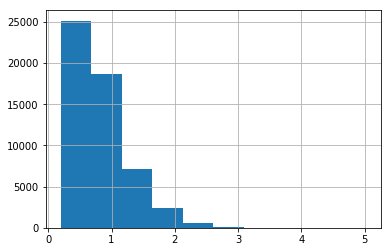

In [6]:
# Pandas has a histogram function built in.

df['carat'].hist()

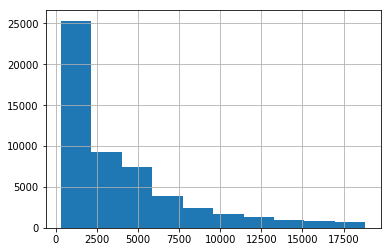

In [7]:
df['price'].hist()

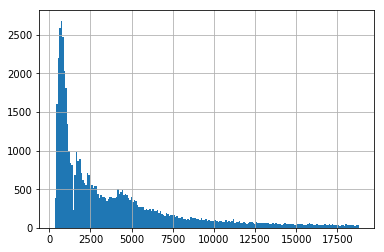

In [8]:
# you can change the number of buckets using the `bins=` argument:

df['price'].hist(bins=200)

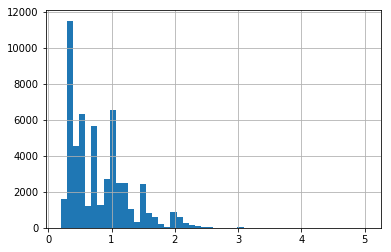

In [9]:
df['carat'].hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a0aec5630>,
      dtype=object)

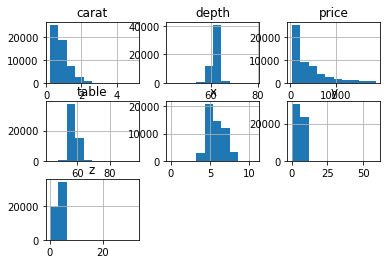

In [10]:
#You can also do it over the entire dataframe, with limited readability.

df.hist()

/home/john/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/john/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


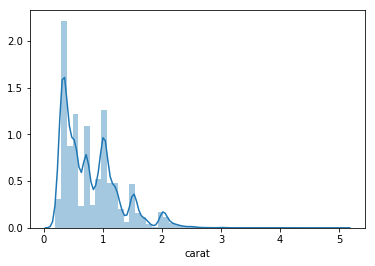

In [11]:
# You can also plot a histogram with seaborn

sb.distplot(df['carat'])

/home/john/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/john/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


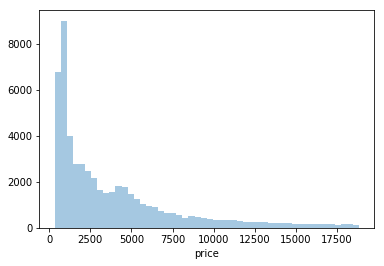

In [12]:
# you can plot it without the fitted line with `kde=False`

sb.distplot(df['price'], kde=False)

/home/john/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/john/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


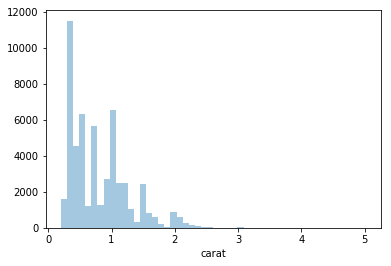

In [13]:
sb.distplot(df['carat'], kde=False)

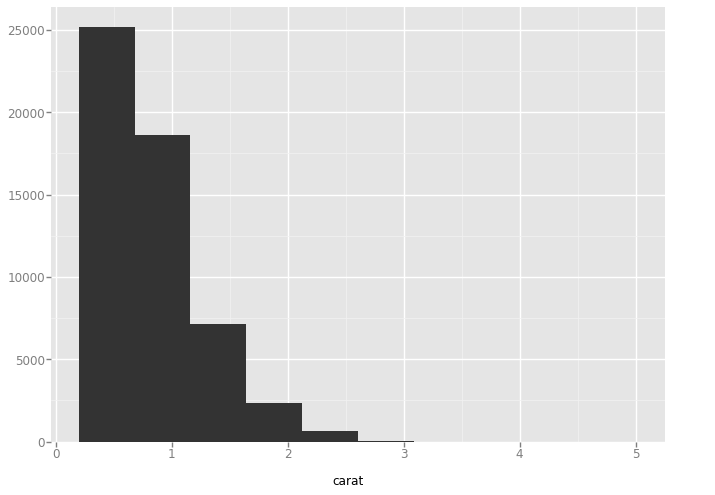

<ggplot: (-9223363281016033911)>

In [14]:
# .. and with ggplot

p = ggplot(aes(x='carat'), data=df)
p + geom_histogram()


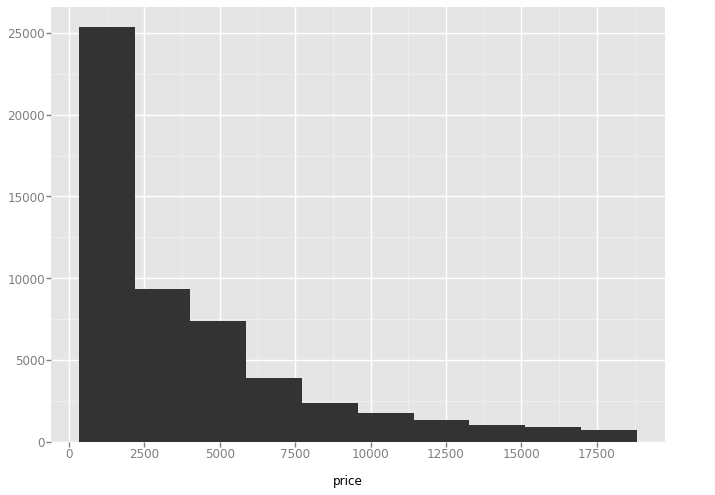

<ggplot: (-9223363281016271840)>

In [15]:
p = ggplot(aes(x='price'), data=df)
p + geom_histogram()

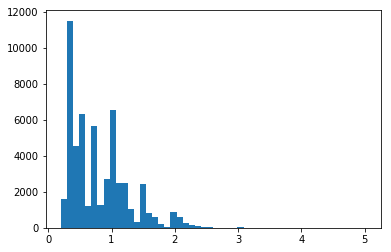

In [16]:
# And finally with raw matplotlib

plt.hist(df['carat'],bins=50)
plt.show()

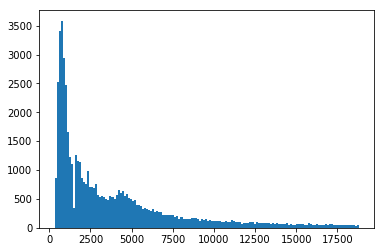

In [17]:
plt.hist(df['price'],bins=150)
plt.show()

Pie Charts
-----------

__Pie charts are frowned upon by modern data scientists__. See *Graphical Perception: Theory, Experimentation, and Application to the Development of Graphical Methods* by William Cleveland and Robert McGill. (via: https://www.formativeco.com/pie-charts-suck-science-data-visualization/ ). 

![Pie Chart](https://www.formativeco.com/wp-content/uploads/2017/09/Screen-Shot-2017-09-18-at-2.10.30-PM-768x515.png "ShowMyImage")

![Bar Chart](https://www.formativeco.com/wp-content/uploads/2017/09/Screen-Shot-2017-09-18-at-2.10.46-PM-768x426.png "ShowMyImage")

Why?

* __Definition__: a circular graph for showing relative composition percentages of a given variable. Works for both numerical and categorical values. 

* __Uses__: 
    * For showing the relative proportion of values within a particular variable.  

* __Examples in Python__:

In [18]:
# With pandas

# use "groupby()" and "count()" functions with pandas to count 
# the numner of entries for each value with a the specified cut. 
sums = df.groupby(df['cut']).count()
# This returns a new dataframe with the cut as the index. 
sums

carat  color  clarity  depth  table  price      x      y      z
cut                                                                       
Fair        1610   1610     1610   1610   1610   1610   1610   1610   1610
Good        4906   4906     4906   4906   4906   4906   4906   4906   4906
Ideal      21551  21551    21551  21551  21551  21551  21551  21551  21551
Premium    13791  13791    13791  13791  13791  13791  13791  13791  13791
Very Good  12082  12082    12082  12082  12082  12082  12082  12082  12082

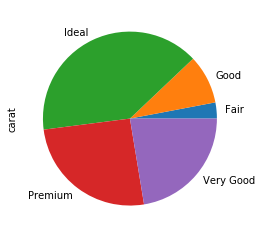

In [19]:
#You can use the built in pandas pie chart to make the chart.  
sums.plot.pie('carat', legend=False)


Bar Chart
---------


* __Definition__: Shows comparisons among discrete categories. One axis of the chart shows the specific categories being compared, and the other axis represents a measured value.  Often used instead of pie charts.  

* __Uses__: 
    * Works on categorical data to show the comparison of values between the categories. 

* __Examples__ in Python:

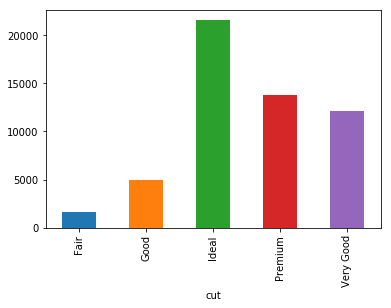

In [20]:
# using pandas. Remember, color is a placeholder to indicate the sum
# of all things returned by groupby

sums.plot.bar(y='color', legend=False)

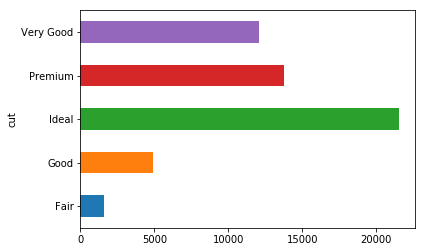

In [21]:
# or as a horizontal plot

sums.plot.barh(y='color', legend=False)

In [22]:
# now using seaborn (this is WRONG,don't use)

#sb.barplot(data=sums)

Box Plot
--------

Sometimes called a box-and-whisker plot.  Like a histogram to show a distribution of data. 


* __Definition__: Shows the 5-value summary of a distribution using graphics. Numerical variables only. 

* __Uses__: 
    * Shows a summary of the distribution of a single numerical variable. 
    * Can be combined on the same plot easily with other distributions. 

* __Examples in Python__:

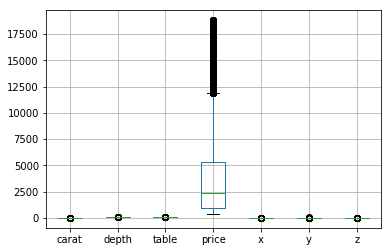

In [23]:
# Using Pandas

df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a09b9cf60>,
      dtype=object)

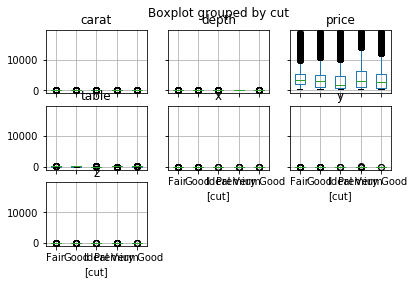

In [24]:
df.boxplot(by='cut')

/usr/lib/python3/dist-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


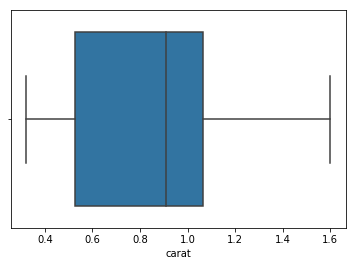

In [25]:
# using seaborn

sb.boxplot(x=df_to_style['carat'])

In [26]:
# Note, seaborn plots "outliers' as points, not the real min/max. 

# Now, using ggplot: (DOESN't WORK!)

#p = ggplot(df['carat'], aes(x='carat')) 
#p + geom_boxplot()

Scatter Plot
--------


* __Definition__: Shows the relationship between two variables by plotting their values against each other. 

* __Uses__: 
    * Shows the relationship (correlation) between two variables.

* __Examples in Python__:

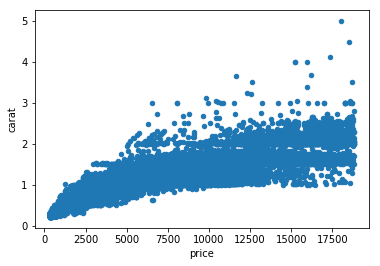

In [27]:
# in pandas

df.plot.scatter(x='price', y='carat')

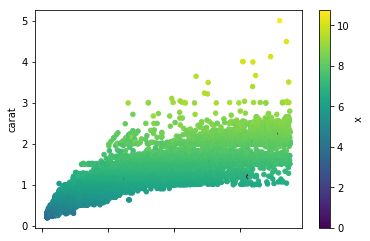

In [28]:
# or plot three variables, where the third is the size of the diamond 
# in mm on the x axis. 
df.plot.scatter(x='price', y='carat', c='x', colormap='viridis')

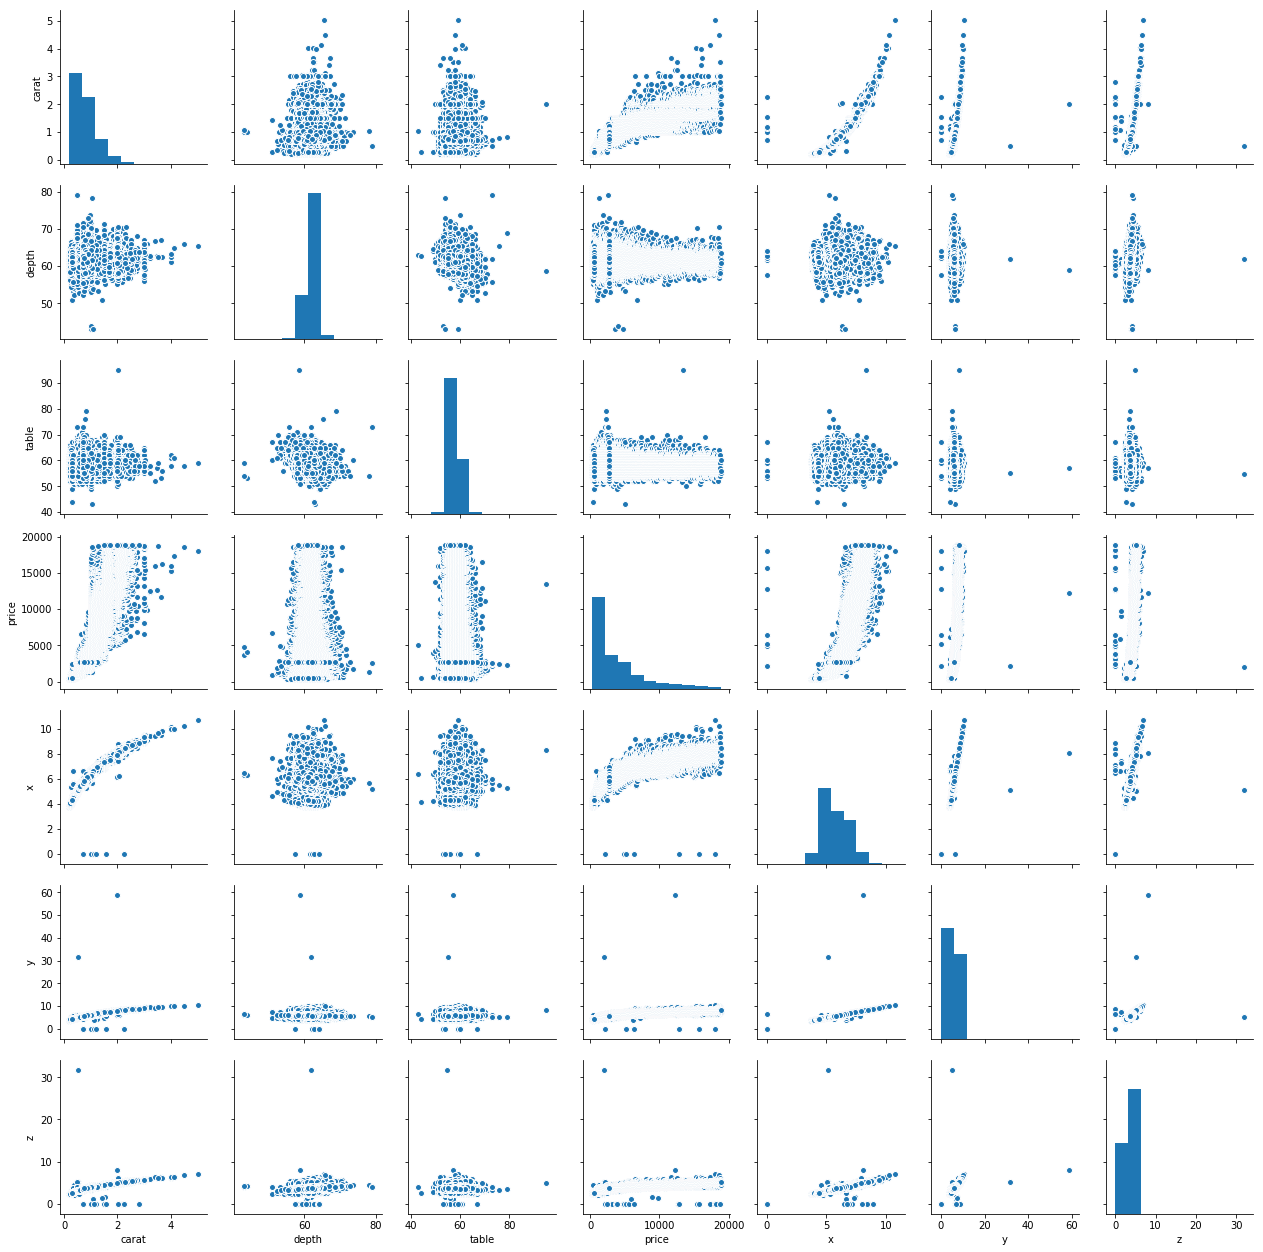

In [29]:
# in seaborn

sb.pairplot(df)

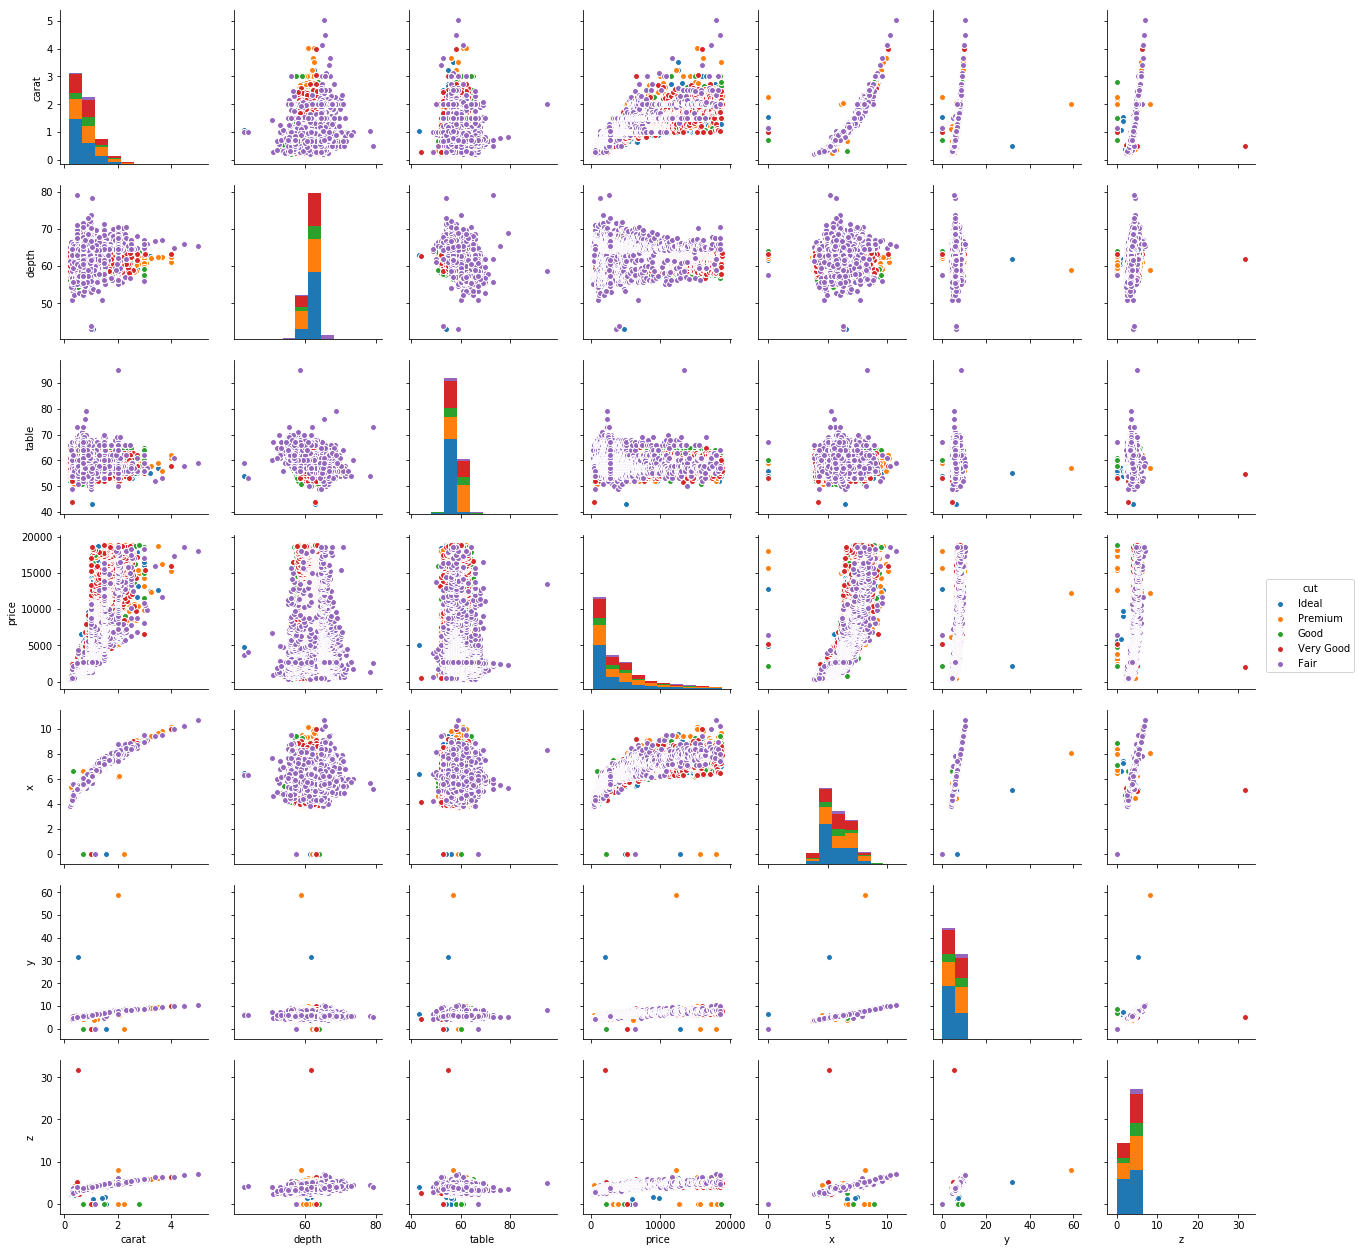

In [30]:
sb.pairplot(df, hue='cut')

Area Plot
--------


* __Definition__:  Shows the composition of a value. 

* __Uses__: 
    * You need to do a proportional analysis.
    * You need a simple comparison between the trend/proportion of each category.
    * You need to compare a small number of categories.

* __Examples__ in Python:

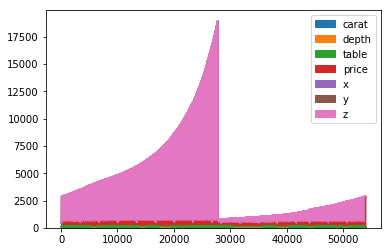

In [43]:
# in pandas

df.plot.area()

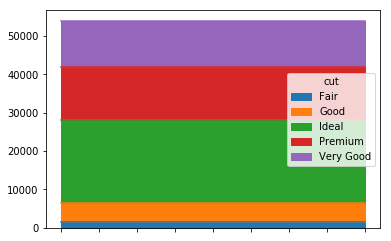

In [32]:
sums.transpose().plot.area()

Heatmap
--------


* __Definition__:  Shows the relative value of various variables to the minimum and maximum based on color. Requires numerical values. All values must have the same units. 

* __Uses__: 
    * Highlights the relative magnitude of many values in a small amount of space
        * Each value can be as small as a pixel

* __Examples__ in Python:

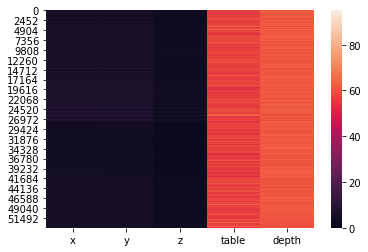

In [34]:
# seaborn

sb.heatmap(df[['x','y','z','table','depth']])

Correlogram
----------


* __Definition__:  Shows randomness within a time series.  The main plot should be near zero if and random errors are truely random. Only for numerical data. 

* __Uses__: 
    * Highlights the presense of patterns in seemingly random data

* __Examples__ in Python:

In [35]:
# pandas built in for finding correlation raw numbers

df.corr()

carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000

In [36]:
from pandas.plotting import autocorrelation_plot


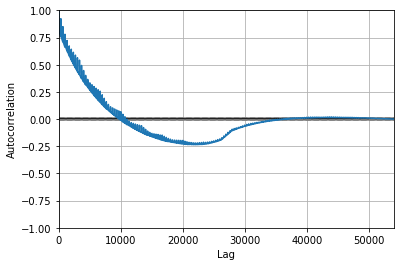

In [38]:
autocorrelation_plot(df['price'])

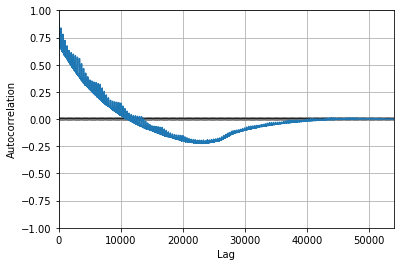

In [39]:
autocorrelation_plot(df['carat'])

Key Takeaways
--------------

You now have a few examples of plotting various kinds of charts in matplotlib, pandas, seaborn, and (a few) in ggplot.  The majority of the plots are available through pandas directly, althought a few are only available through matplotlib or seaborn.  I would stay away from ggplot on Python at the moment, as it's limited and buggy. 

Documentation for Pandas built in visualizations is here:
https://pandas.pydata.org/pandas-docs/stable/visualization.html

Seaborn:
https://seaborn.pydata.org/tutorial.html

matplotlib:
https://matplotlib.org/users/index.html

For every visualization you see, ask yourself the following questions:

 * What variables is this visualization trying to show me?
 * Am I able to interpret the results quickly and easily?
 * Is every element of the visualization adding to my understanding of the data?
 
If you can answer the first question quickly, and the other two in the affirmative, then you have an effective visualization. 